# Read the Data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Hotel Reservations.csv')

# Display the first few rows of the dataframe
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Data Exploration

In [2]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [3]:
# Statistical summary of the dataset
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


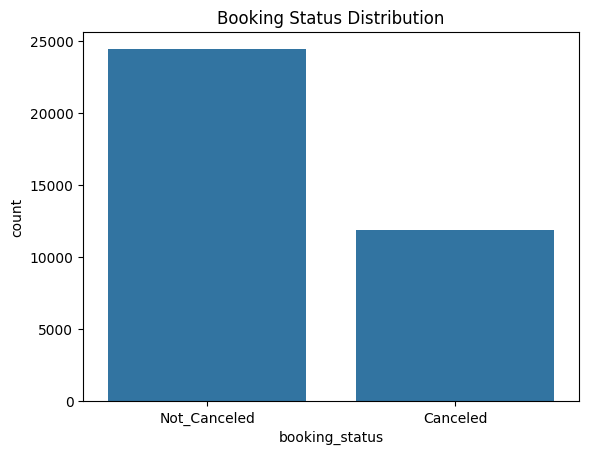

In [4]:
# Checking the distribution of the target variable

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='booking_status', data=df)
plt.title('Booking Status Distribution')
plt.show()

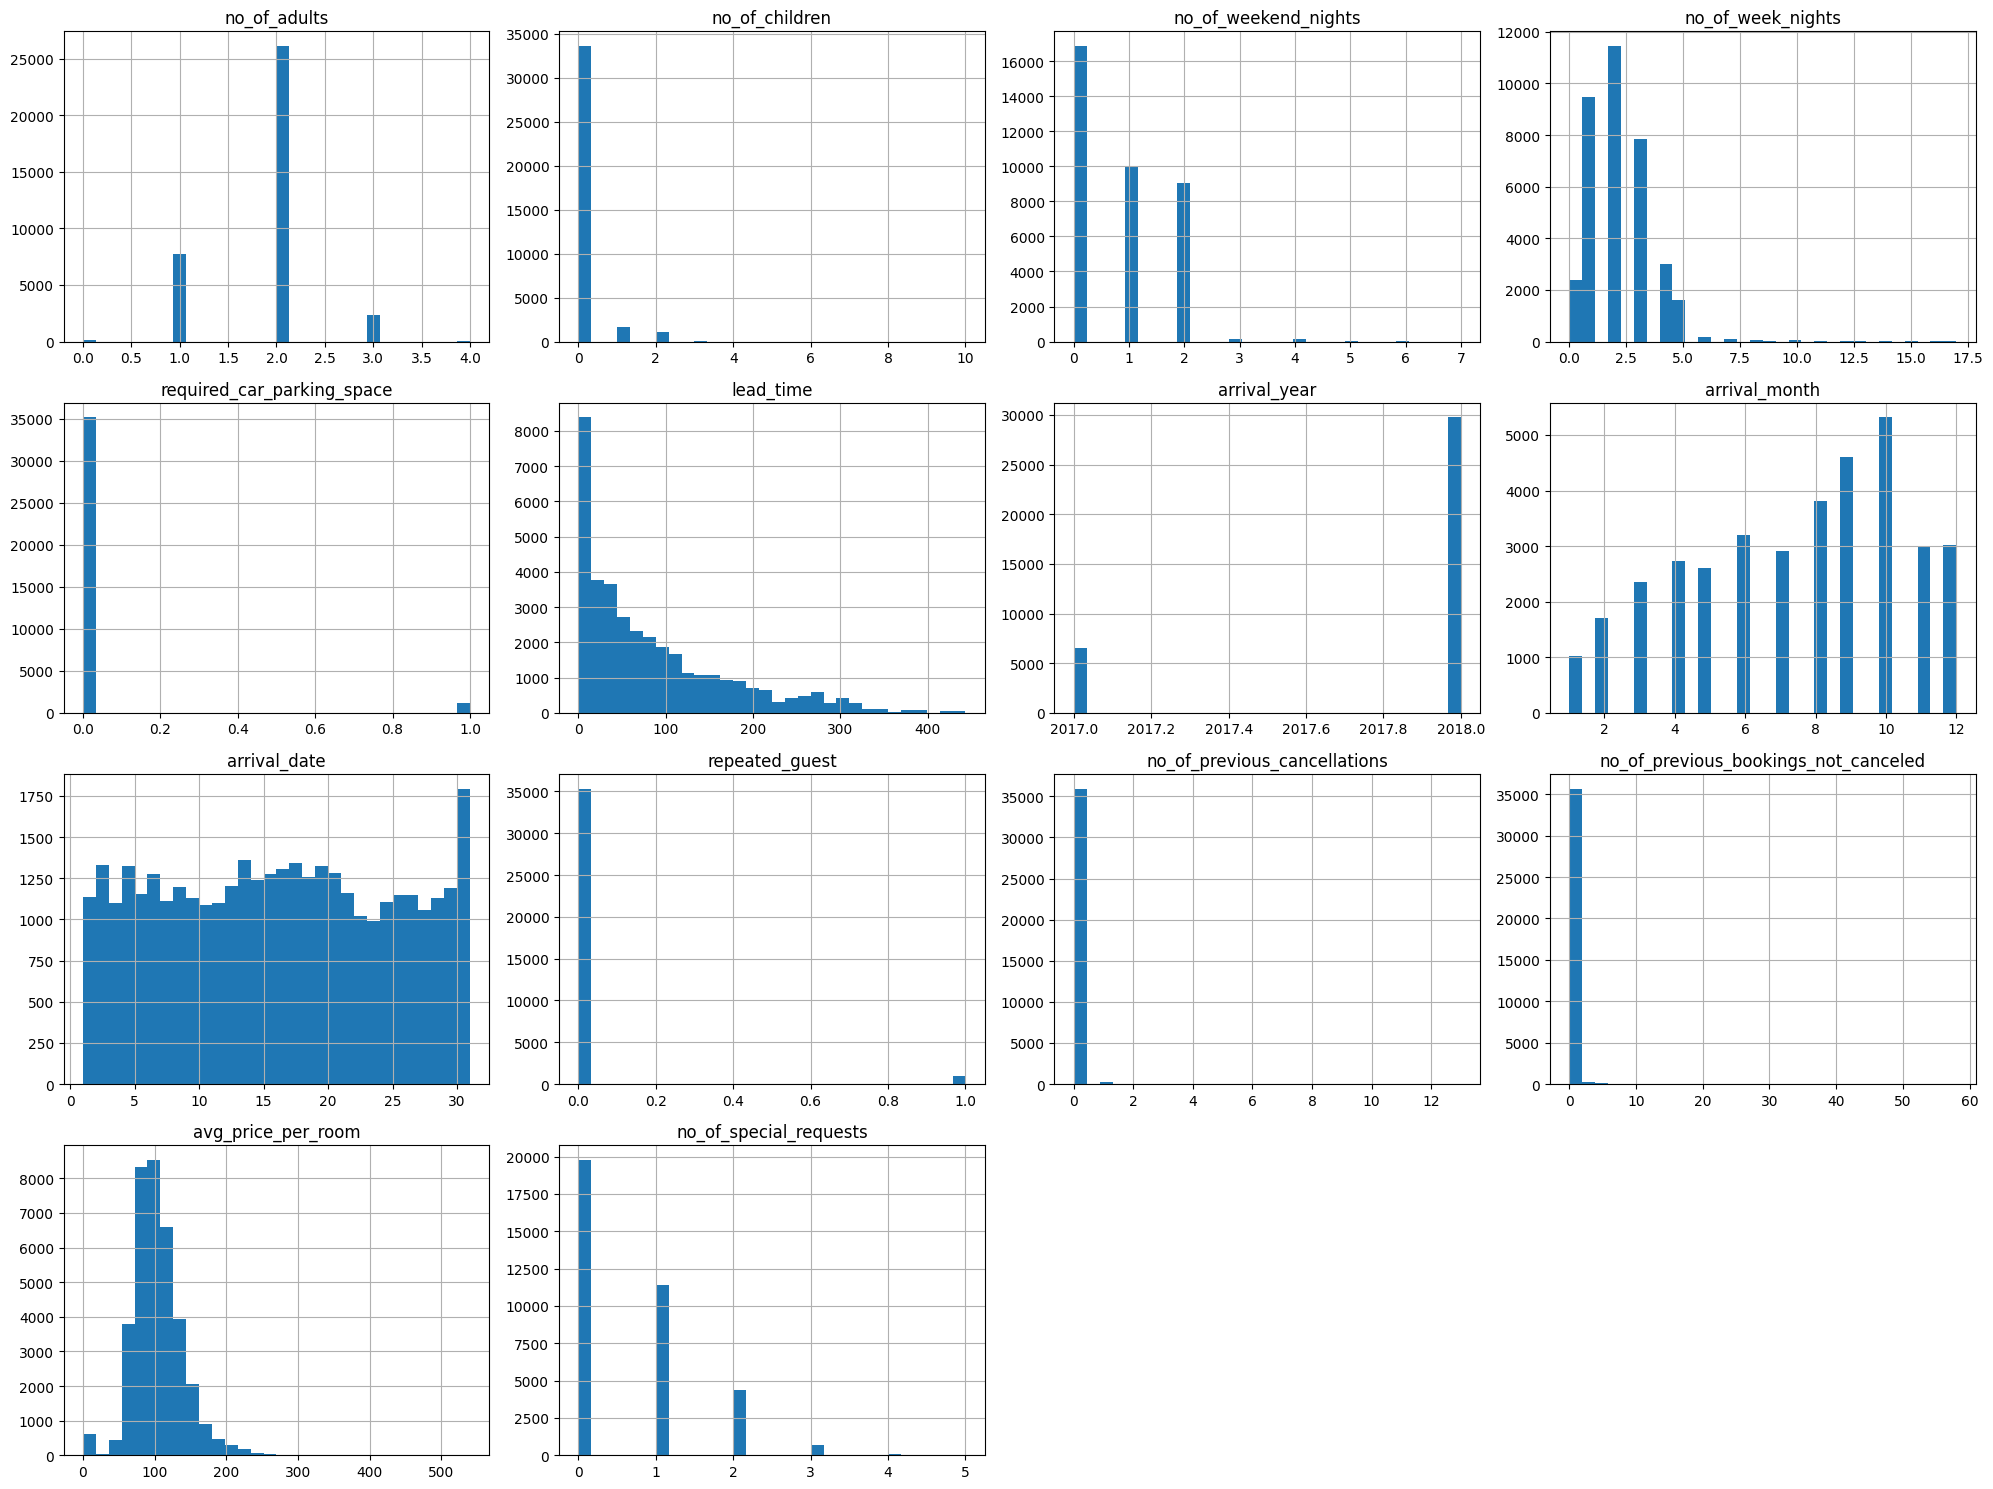

In [5]:
# Visualizing the distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

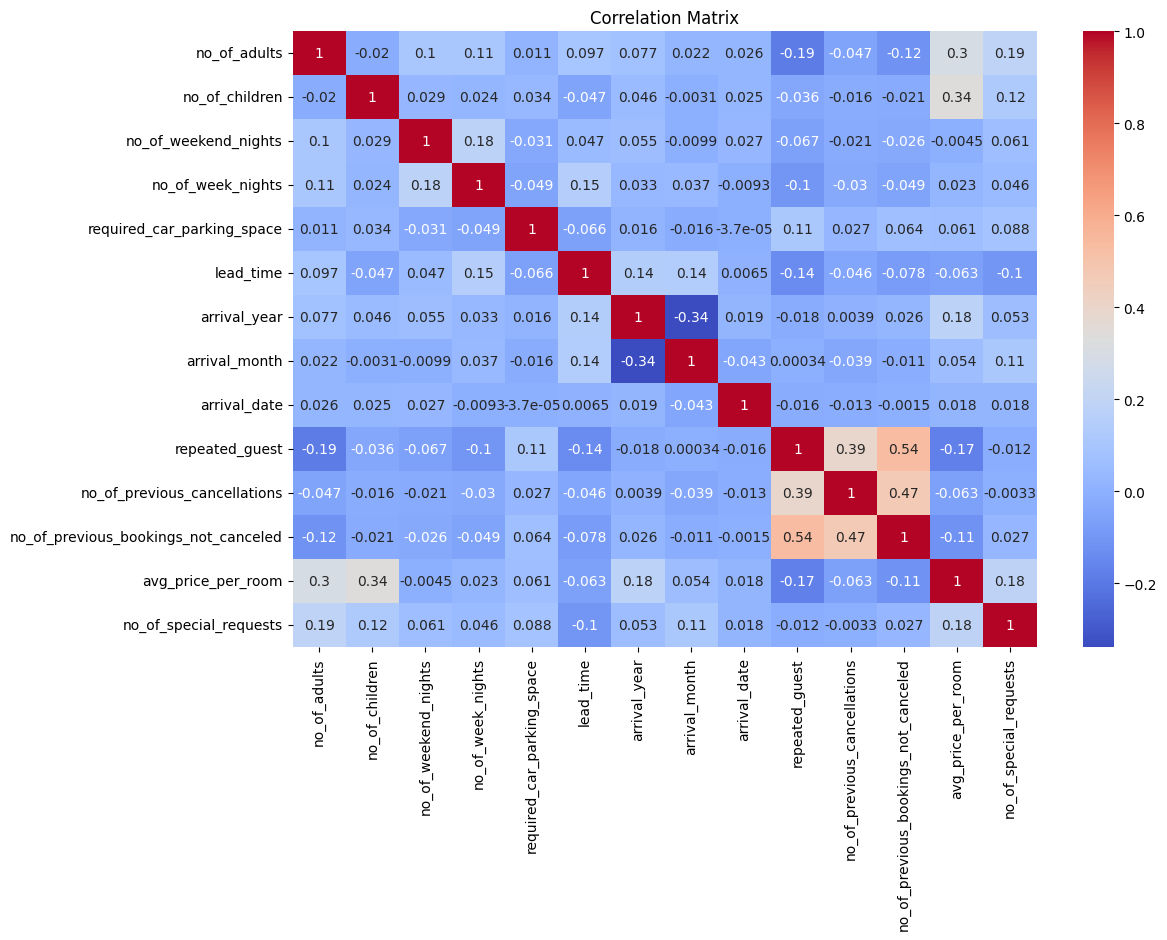

In [6]:
# Checking the correlation between numerical features
# Ensure all columns are numeric for correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate and plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

## Data Cleaning

## Handling Missing Values

In [7]:
# Checking for missing values
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [8]:
# Handling missing values (if any)
df.dropna(inplace=True)  # Example: Dropping rows with missing values

## Handling Duplicate Values

In [9]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [10]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

### Handling Outliers

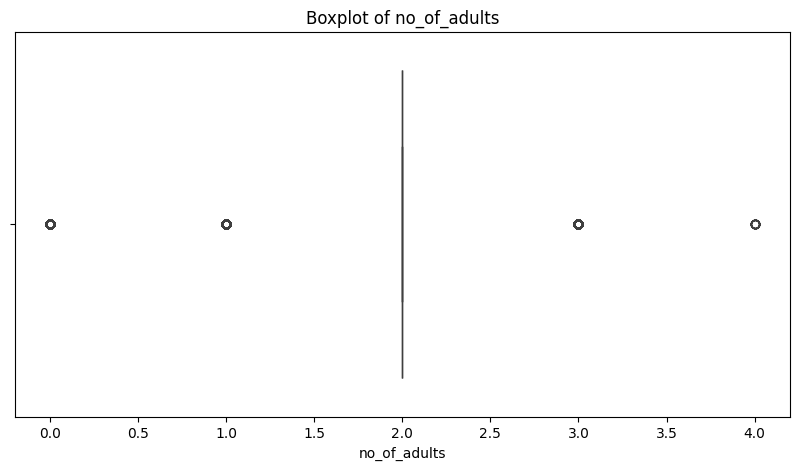

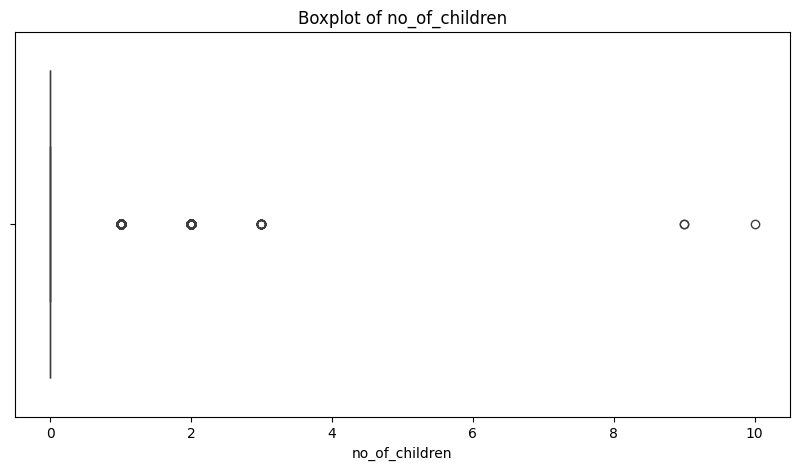

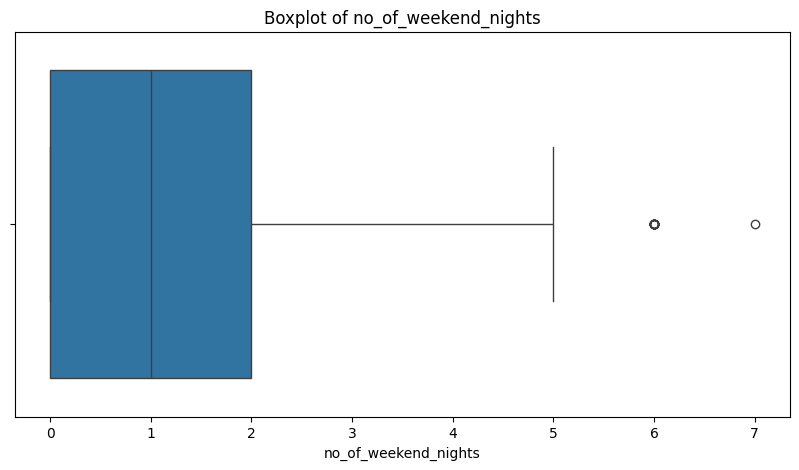

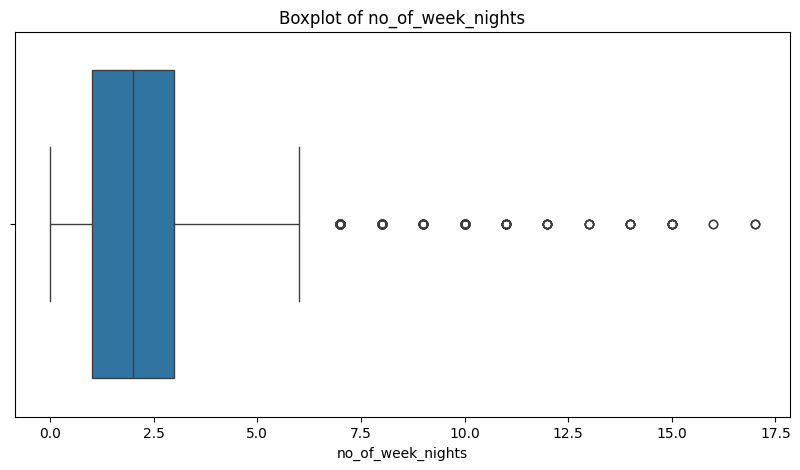

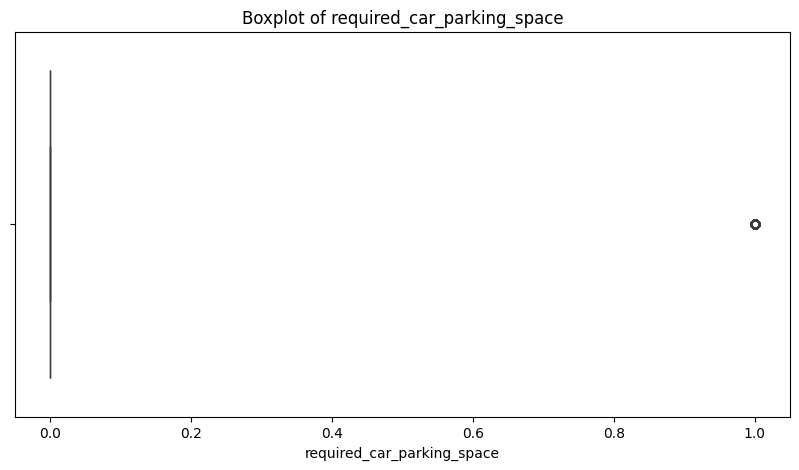

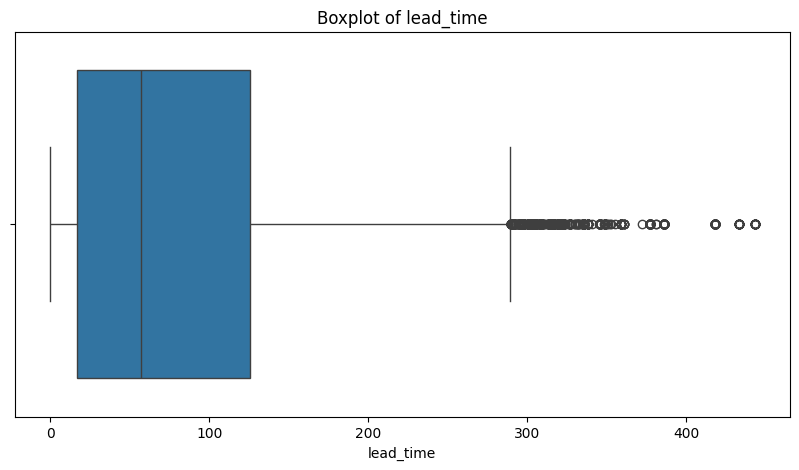

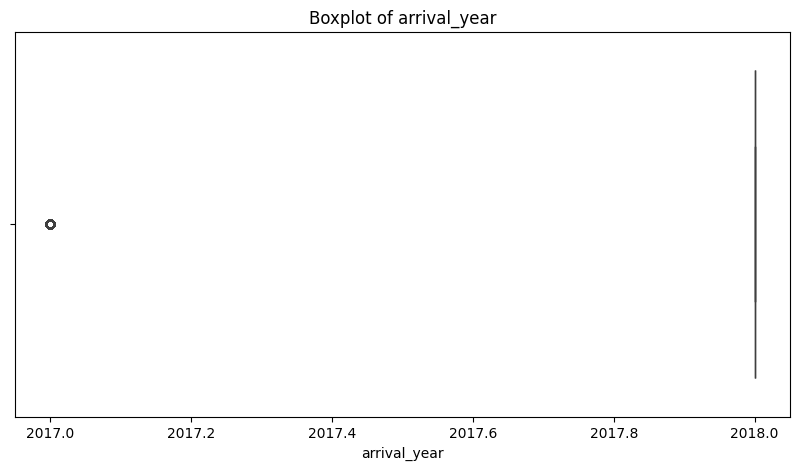

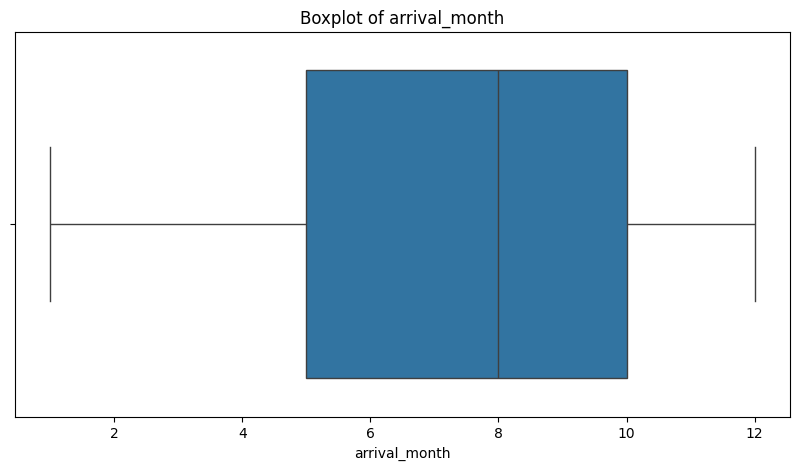

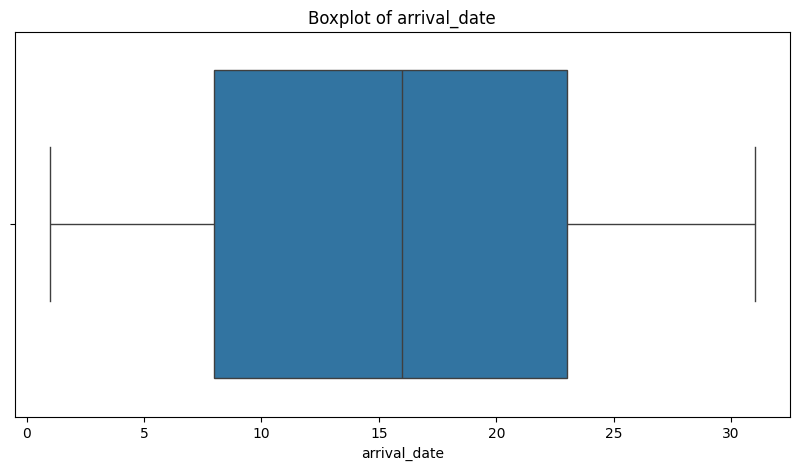

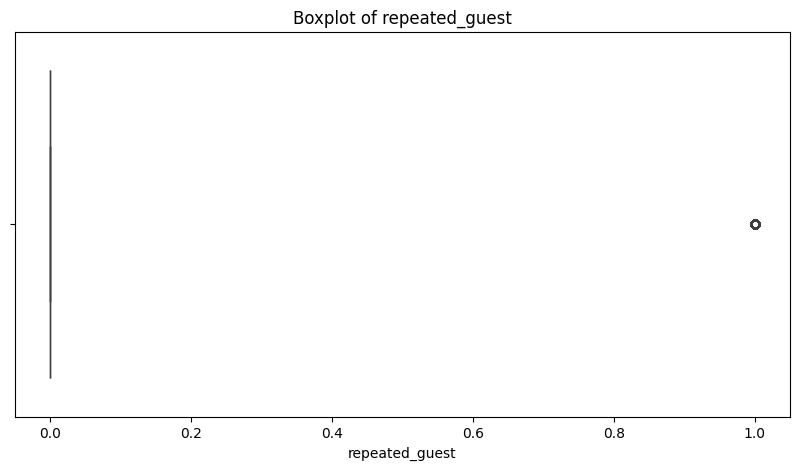

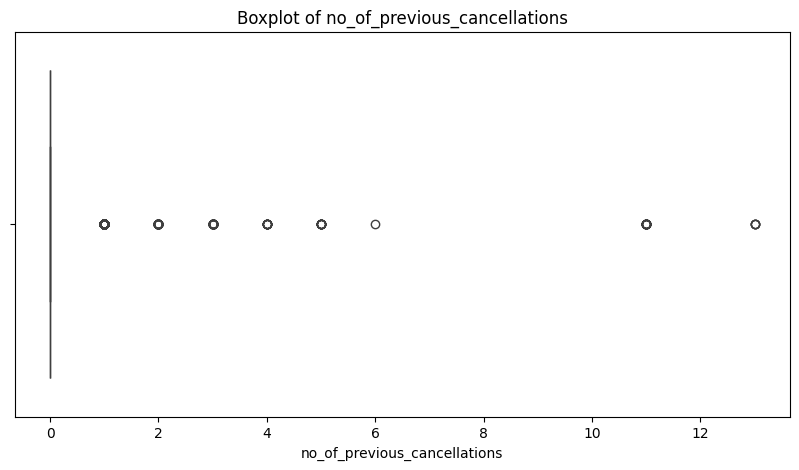

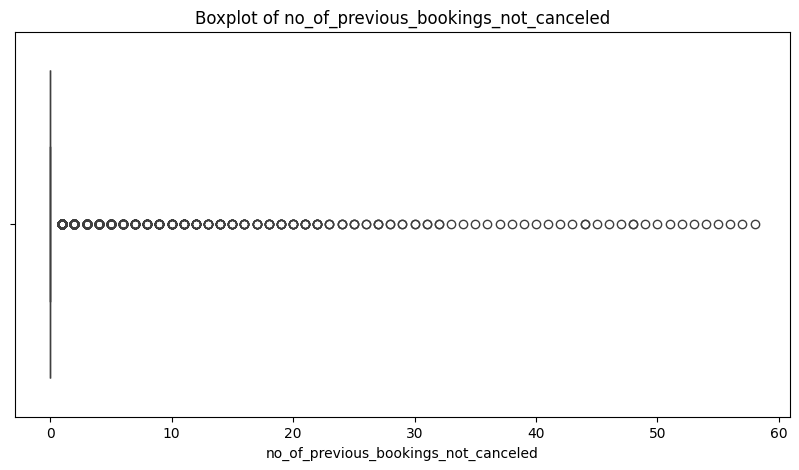

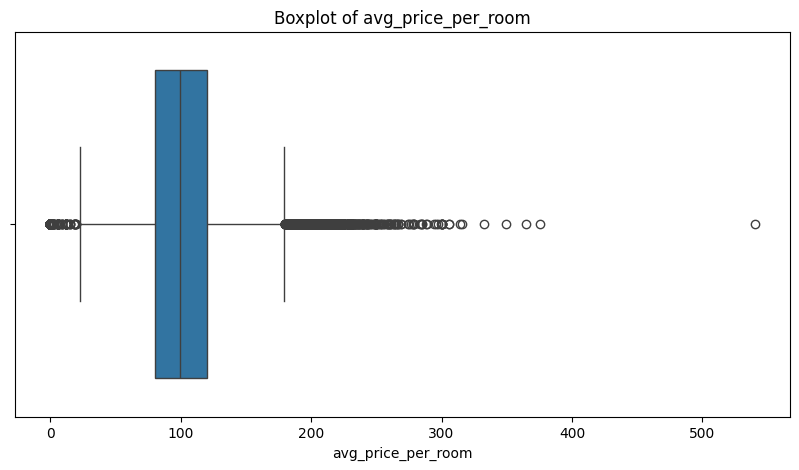

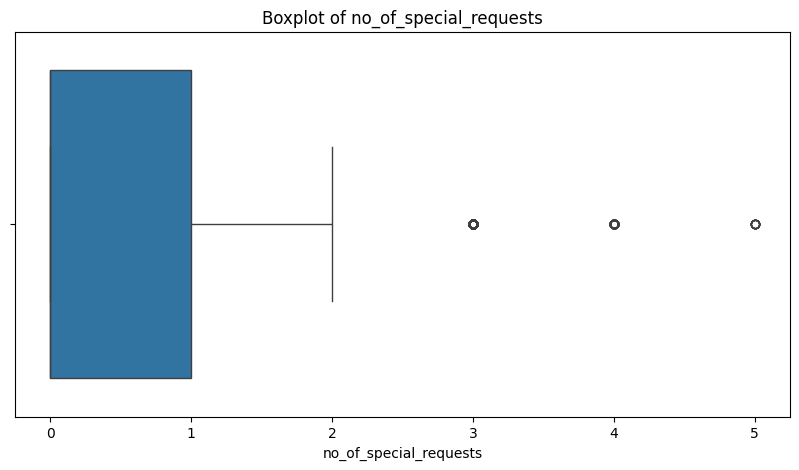

In [11]:
# Boxplot to visualize outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [12]:
# Handling Outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    return df

numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room', 'no_of_special_requests']
for col in numerical_cols:
    df = remove_outliers(df, col)

### Handling Inconsistencies [Optional]



```
# This is formatted as code
```

## Feature Engineering

### Feature Transformation

#### Scaling and Normalization

In [13]:
from sklearn.preprocessing import StandardScaler

# Scaling and Normalization
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


#### Encoding Categorical Variables

In [14]:
# Encoding Categorical Variables
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)


#### Creating New Features [Optional]

## Data Splitting

### Split into features (x) and target (y)

In [15]:
from sklearn.model_selection import train_test_split
# Data Splitting
x = df.drop(columns=['Booking_ID', 'booking_status'])
y = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [16]:
y.value_counts()

,count
booking_status,
0,14416
1,7480


### Split into training and testing

In [17]:
# Splitting into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the Model

## Model Selection

Train and evaluate different with different hyperparameters

In [18]:
from sklearn.metrics import classification_report, accuracy_score

In [19]:
# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)
print("Logistic Regression")
print(classification_report(ytrain, trainpred))
print(classification_report(ytest, testpred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.89      0.86     11484
           1       0.75      0.64      0.69      6032

    accuracy                           0.80     17516
   macro avg       0.79      0.76      0.77     17516
weighted avg       0.80      0.80      0.80     17516

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      2932
           1       0.71      0.62      0.66      1448

    accuracy                           0.79      4380
   macro avg       0.77      0.75      0.76      4380
weighted avg       0.79      0.79      0.79      4380



In [21]:
lr_train_acc = accuracy_score(ytrain, trainpred)
lr_test_acc = accuracy_score(ytest, testpred)


In [22]:
model = LogisticRegression(class_weight = 'balanced')
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)
print("Logistic Regression Balanced")
print(classification_report(ytrain, trainpred))
print(classification_report(ytest, testpred))

Logistic Regression Balanced
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     11484
           1       0.67      0.76      0.71      6032

    accuracy                           0.79     17516
   macro avg       0.77      0.78      0.77     17516
weighted avg       0.80      0.79      0.79     17516

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2932
           1       0.64      0.75      0.69      1448

    accuracy                           0.78      4380
   macro avg       0.75      0.77      0.76      4380
weighted avg       0.79      0.78      0.78      4380



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
lr_bal_train_acc = accuracy_score(ytrain, trainpred)
lr_bal_test_acc = accuracy_score(ytest, testpred)

In [24]:
# DECISION TREE

In [25]:
# Plain Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_plain = DecisionTreeClassifier()
dt_plain.fit(xtrain, ytrain)
train_pred_dt_plain = dt_plain.predict(xtrain)
test_pred_dt_plain = dt_plain.predict(xtest)
print("Plain Decision Tree")
print(classification_report(ytrain, train_pred_dt_plain))
print(classification_report(ytest, test_pred_dt_plain))
dt_plain_train_acc = accuracy_score(ytrain, train_pred_dt_plain)
dt_plain_test_acc = accuracy_score(ytest, test_pred_dt_plain)

Plain Decision Tree
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11484
           1       0.99      0.99      0.99      6032

    accuracy                           0.99     17516
   macro avg       0.99      0.99      0.99     17516
weighted avg       0.99      0.99      0.99     17516

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2932
           1       0.79      0.80      0.79      1448

    accuracy                           0.86      4380
   macro avg       0.84      0.85      0.84      4380
weighted avg       0.86      0.86      0.86      4380



In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)
print("Decision Tree")
print(classification_report(ytrain, trainpred))
print(classification_report(ytest, testpred))

Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     11484
           1       0.67      0.76      0.71      6032

    accuracy                           0.79     17516
   macro avg       0.77      0.78      0.77     17516
weighted avg       0.80      0.79      0.79     17516

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2932
           1       0.64      0.75      0.69      1448

    accuracy                           0.78      4380
   macro avg       0.75      0.77      0.76      4380
weighted avg       0.79      0.78      0.78      4380



In [27]:
dt_train_acc = accuracy_score(ytrain, trainpred)
dt_test_acc = accuracy_score(ytest, testpred)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=8)
dt_model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)
print("Decision Tree = Max_Depth 8")
print(classification_report(ytrain, trainpred))
print(classification_report(ytest, testpred))

Decision Tree = Max_Depth 8
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     11484
           1       0.67      0.76      0.71      6032

    accuracy                           0.79     17516
   macro avg       0.77      0.78      0.77     17516
weighted avg       0.80      0.79      0.79     17516

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2932
           1       0.64      0.75      0.69      1448

    accuracy                           0.78      4380
   macro avg       0.75      0.77      0.76      4380
weighted avg       0.79      0.78      0.78      4380



In [29]:
dt8_train_acc = accuracy_score(ytrain, trainpred)
dt8_test_acc = accuracy_score(ytest, testpred)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=20)
dt_model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)
print("Decision Tree = Max_Depth 20")
print(classification_report(ytrain, trainpred))
print(classification_report(ytest, testpred))

Decision Tree = Max_Depth 20
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     11484
           1       0.67      0.76      0.71      6032

    accuracy                           0.79     17516
   macro avg       0.77      0.78      0.77     17516
weighted avg       0.80      0.79      0.79     17516

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2932
           1       0.64      0.75      0.69      1448

    accuracy                           0.78      4380
   macro avg       0.75      0.77      0.76      4380
weighted avg       0.79      0.78      0.78      4380



In [31]:
dt20_train_acc = accuracy_score(ytrain, trainpred)
dt20_test_acc = accuracy_score(ytest, testpred)

In [32]:
# Decision Tree with entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(xtrain, ytrain)
train_pred_entropy = dt_entropy.predict(xtrain)
test_pred_entropy = dt_entropy.predict(xtest)
print("Decision Tree with Entropy")
print(classification_report(ytrain, train_pred_entropy))
print(classification_report(ytest, test_pred_entropy))


Decision Tree with Entropy
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11484
           1       0.99      0.99      0.99      6032

    accuracy                           0.99     17516
   macro avg       0.99      0.99      0.99     17516
weighted avg       0.99      0.99      0.99     17516

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2932
           1       0.79      0.81      0.80      1448

    accuracy                           0.87      4380
   macro avg       0.85      0.85      0.85      4380
weighted avg       0.87      0.87      0.87      4380



In [33]:
dt_entropy_train_acc = accuracy_score(ytrain, train_pred_entropy)
dt_entropy_test_acc = accuracy_score(ytest, test_pred_entropy)

In [34]:
# Decision Tree with class_weight balanced
dt_balanced = DecisionTreeClassifier(class_weight='balanced')
dt_balanced.fit(xtrain, ytrain)
train_pred_balanced = dt_balanced.predict(xtrain)
test_pred_balanced = dt_balanced.predict(xtest)
print("Decision Tree with Class Weight Balanced")
print(classification_report(ytrain, train_pred_balanced))
print(classification_report(ytest, test_pred_balanced))

Decision Tree with Class Weight Balanced
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11484
           1       0.99      0.99      0.99      6032

    accuracy                           0.99     17516
   macro avg       0.99      0.99      0.99     17516
weighted avg       0.99      0.99      0.99     17516

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2932
           1       0.78      0.79      0.78      1448

    accuracy                           0.86      4380
   macro avg       0.84      0.84      0.84      4380
weighted avg       0.86      0.86      0.86      4380



In [35]:
dt_bal_train_acc = accuracy_score(ytrain, train_pred_balanced)
dt_bal_test_acc = accuracy_score(ytest, test_pred_balanced)

In [36]:
# KNN MODELS

In [37]:
# Plain KNN
from sklearn.neighbors import KNeighborsClassifier

knn_plain = KNeighborsClassifier()
knn_plain.fit(xtrain, ytrain)
train_pred_knn_plain = knn_plain.predict(xtrain)
test_pred_knn_plain = knn_plain.predict(xtest)
print("Plain KNN")
print(classification_report(ytrain, train_pred_knn_plain))
print(classification_report(ytest, test_pred_knn_plain))
knn_plain_train_acc = accuracy_score(ytrain, train_pred_knn_plain)
knn_plain_test_acc = accuracy_score(ytest, test_pred_knn_plain)

Plain KNN
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11484
           1       0.86      0.80      0.83      6032

    accuracy                           0.89     17516
   macro avg       0.88      0.87      0.87     17516
weighted avg       0.88      0.89      0.88     17516

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2932
           1       0.76      0.71      0.74      1448

    accuracy                           0.83      4380
   macro avg       0.81      0.80      0.81      4380
weighted avg       0.83      0.83      0.83      4380



In [38]:
# KNN with 3 neighbors
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(xtrain, ytrain)
train_pred_knn3 = knn3.predict(xtrain)
test_pred_knn3 = knn3.predict(xtest)
print("KNN with 3 Neighbors")
print(classification_report(ytrain, train_pred_knn3))
print(classification_report(ytest, test_pred_knn3))

KNN with 3 Neighbors
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11484
           1       0.89      0.85      0.87      6032

    accuracy                           0.91     17516
   macro avg       0.91      0.90      0.90     17516
weighted avg       0.91      0.91      0.91     17516

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2932
           1       0.76      0.73      0.75      1448

    accuracy                           0.83      4380
   macro avg       0.81      0.81      0.81      4380
weighted avg       0.83      0.83      0.83      4380



In [39]:
knn3_train_acc = accuracy_score(ytrain, train_pred_knn3)
knn3_test_acc = accuracy_score(ytest, test_pred_knn3)

In [40]:
# KNN with 5 neighbors
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(xtrain, ytrain)
train_pred_knn5 = knn5.predict(xtrain)
test_pred_knn5 = knn5.predict(xtest)
print("KNN with 5 Neighbors")
print(classification_report(ytrain, train_pred_knn5))
print(classification_report(ytest, test_pred_knn5))

KNN with 5 Neighbors
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11484
           1       0.86      0.80      0.83      6032

    accuracy                           0.89     17516
   macro avg       0.88      0.87      0.87     17516
weighted avg       0.88      0.89      0.88     17516

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2932
           1       0.76      0.71      0.74      1448

    accuracy                           0.83      4380
   macro avg       0.81      0.80      0.81      4380
weighted avg       0.83      0.83      0.83      4380



In [41]:
knn5_train_acc = accuracy_score(ytrain, train_pred_knn5)
knn5_test_acc = accuracy_score(ytest, test_pred_knn5)

In [42]:
# KNN with 7 neighbors
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(xtrain, ytrain)
train_pred_knn7 = knn7.predict(xtrain)
test_pred_knn7 = knn7.predict(xtest)
print("KNN with 7 Neighbors")
print(classification_report(ytrain, train_pred_knn7))
print(classification_report(ytest, test_pred_knn7))

KNN with 7 Neighbors
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11484
           1       0.84      0.77      0.80      6032

    accuracy                           0.87     17516
   macro avg       0.86      0.85      0.85     17516
weighted avg       0.87      0.87      0.87     17516

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2932
           1       0.76      0.70      0.73      1448

    accuracy                           0.83      4380
   macro avg       0.81      0.80      0.80      4380
weighted avg       0.83      0.83      0.83      4380



In [43]:
knn7_train_acc = accuracy_score(ytrain, train_pred_knn7)
knn7_test_acc = accuracy_score(ytest, test_pred_knn7)

## Train the Model

In [44]:
# Decision Tree with entropy
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

## Predictions

Training as well as testing data

In [45]:
# Predictions on the training set
train_pred = model.predict(xtrain)

# Predictions on the testing set
test_pred = model.predict(xtest)


## Evaluate the Model

In [46]:
# Evaluation on the training set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_entropy_train_acc = accuracy_score(ytrain, train_pred_entropy)
print(f'Training Accuracy (Decision Tree with Entropy): {dt_entropy_train_acc}')
print('Classification Report (Training):')
print(classification_report(ytrain, train_pred_entropy))
print('Confusion Matrix (Training):')
print(confusion_matrix(ytrain, train_pred_entropy))

# Evaluation on the testing set
dt_entropy_test_acc = accuracy_score(ytest, test_pred_entropy)
print(f'Testing Accuracy (Decision Tree with Entropy): {dt_entropy_test_acc}')
print('Classification Report (Testing):')
print(classification_report(ytest, test_pred_entropy))
print('Confusion Matrix (Testing):')
print(confusion_matrix(ytest, test_pred_entropy))

Training Accuracy (Decision Tree with Entropy): 0.9932062114638045
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11484
           1       0.99      0.99      0.99      6032

    accuracy                           0.99     17516
   macro avg       0.99      0.99      0.99     17516
weighted avg       0.99      0.99      0.99     17516

Confusion Matrix (Training):
[[11446    38]
 [   81  5951]]
Testing Accuracy (Decision Tree with Entropy): 0.8668949771689498
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2932
           1       0.79      0.81      0.80      1448

    accuracy                           0.87      4380
   macro avg       0.85      0.85      0.85      4380
weighted avg       0.87      0.87      0.87      4380

Confusion Matrix (Testing):
[[2620  312]
 [ 271 1177]]


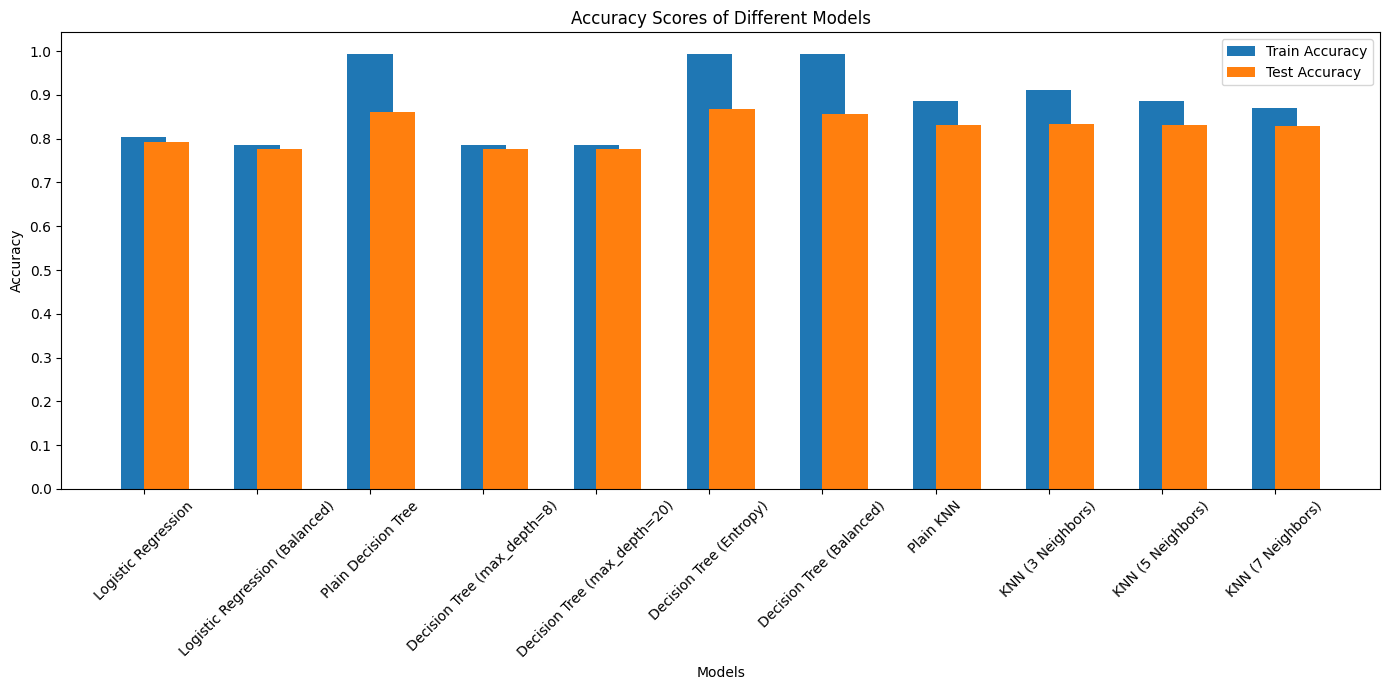

In [47]:
# Plotting accuracy scores
models = ['Logistic Regression', 'Logistic Regression (Balanced)',
          'Plain Decision Tree', 'Decision Tree (max_depth=8)', 'Decision Tree (max_depth=20)',
          'Decision Tree (Entropy)', 'Decision Tree (Balanced)',
          'Plain KNN', 'KNN (3 Neighbors)', 'KNN (5 Neighbors)', 'KNN (7 Neighbors)']

train_accuracies = [lr_train_acc, lr_bal_train_acc,
                    dt_plain_train_acc, dt8_train_acc, dt20_train_acc,
                    dt_entropy_train_acc, dt_bal_train_acc,
                    knn_plain_train_acc, knn3_train_acc, knn5_train_acc, knn7_train_acc]

test_accuracies = [lr_test_acc, lr_bal_test_acc,
                   dt_plain_test_acc, dt8_test_acc, dt20_test_acc,
                   dt_entropy_test_acc, dt_bal_test_acc,
                   knn_plain_test_acc, knn3_test_acc, knn5_test_acc, knn7_test_acc]

x = range(len(models))

plt.figure(figsize=(14, 7))
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.xticks(x, models, rotation=45)
plt.yticks([i/10 for i in range(11)])
plt.legend()
plt.tight_layout()
plt.show()
